## Ankita Veerabahu - 200968266
## ML LAB-3 EX-1

### Q.6 Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic_train = pd.read_csv('train.csv') 
titanic_test = pd.read_csv('test.csv')
titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [3]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [5]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
titanic_train.shape

(891, 8)

In [7]:
titanic_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [8]:
titanic_test.shape

(418, 7)

In [9]:
sex = {'male' : 0, 'female' : 1}
embarked = {'S' : 0, 'C' : 1, 'Q' : 2}

In [10]:
titanic_train['Sex'] = titanic_train['Sex'].map(sex)
titanic_train['Embarked'] = titanic_train['Embarked'].map(embarked)

In [11]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [12]:
titanic_train['Age'] = titanic_train['Age'].replace(np.nan, titanic_train['Age'].mean())
titanic_train['Embarked'] = titanic_train['Embarked'].replace(np.nan, titanic_train['Embarked'].median())

### Q.7 Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step. 


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [14]:
X = titanic_train.copy()
y = X.pop('Survived')

In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

encoder = preprocessing.OneHotEncoder().fit(X_train)
encoder.transform(X_train).toarray()

pipe = Pipeline([('standardisation', preprocessing.StandardScaler()), 
                 ('naive_bayes', GaussianNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardisation', StandardScaler()),
                ('naive_bayes', GaussianNB())])

In [18]:
pipe.score(X_test, y_test)

0.8111111111111111

In [19]:
y_pred = pipe.predict(X_test)

In [20]:
mat = metrics.confusion_matrix(y_test, y_pred)

<AxesSubplot:>

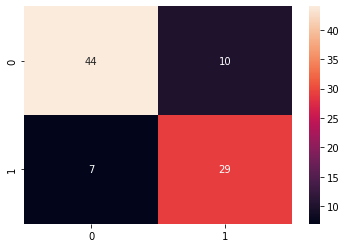

In [21]:
sns.heatmap(mat, annot = True)

### Q.8 Perform Bayes classification using cross validation

In [22]:
from sklearn.model_selection import KFold

In [23]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 105)

### Q.9 Tabulate using relevant measures of accuracy , sensitivity, specificity.

In [24]:
accuracy = cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'accuracy')
np.mean(accuracy)

0.7890123456790124

In [25]:
sensitivity = cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'recall')
np.mean(sensitivity)

0.6939118472523645

In [26]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.8148148148148148

### Q.8 Visualize the ROC curve and comment on performance

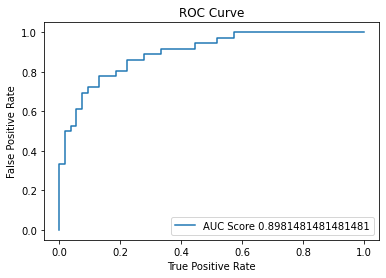

In [29]:
y_score = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)
plt.plot(fpr, tpr, label = 'AUC Score ' + str(auc))
plt.title('ROC Curve')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

C:\Users\R VEERABAHU\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'False Positive Rate')

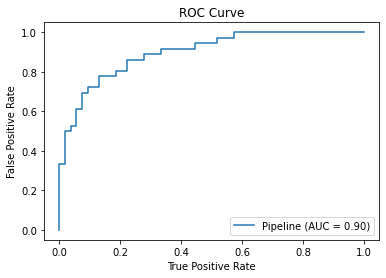

In [33]:
metrics.plot_roc_curve(pipe, X_test, y_test)
plt.title('ROC Curve')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

In [28]:
# An AUC score of 0.8981 is moderately good, and most predictions are correct